Pairwise Training:

    Train the model on pairs of teams. For each game, 
you can have a binary outcome: either Team A wins or Team B wins. This can help the model learn the matchups more explicitly.


In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import preprocessing
# Load the data
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_prepreprocess_data.csv')


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'WL'] + ['WL']]

#drop the columns that are not needed
x_excluded_independent_variables = ['GAME_DATE', 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions', 'SEASON_ID', 'MATCHUP', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP', 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP' #,  'Defensive_Possessions'
                                    , 'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP'] #, 'TEAM_ID_OPP'

#drop the columns that are not needed
preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
print(preprocessor_data.columns)

# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

Index(['TEAM_ID', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'Home_Away',
       'TEAM_ID_OPP', 'MATCHUP_ID', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN',
       'eFG%', 'AST%', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'PTS_DIFF', 'PTS_PER_MIN_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded'],
      dtype='object')


C:\Users\ghadf\AppData\Local\Temp\ipykernel_3224\3150649324.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Assume prediction_data is your dataset
prediction_data = ...  # Load your data here

# Define feature groups
categorical_features = ['TEAM_ID', 'TEAM_ID_OPP', 'Home_Away', 'MATCHUP_ID']
numerical_features = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 
                      'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 
                      'ORtg_DIFF', 'PER%_DIFF', 'YEAR', 'MONTH', 'DAY']

# Define transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# You might want to create separate preprocessors for tree and non-tree models
tree_preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder())
    ]), categorical_features)
])

nontree_preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])


# Example usage based on model type
#model_type = 'tree'  # Assume a tree model; change this based on your model

#try:
#    if model_type == 'tree':
#        tree_preprocessed_data = tree_preprocessor.fit_transform(prediction_data)
#    else:
#        non_tree_preprocessed_data = nontree_preprocessor.fit_transform(prediction_data)
#except Exception as e:
#    print(f"Error in preprocessing: {e}")


In [ ]:
##UPDATE: because they are identification for the season and team, I would like to update my preprocessor so the variable is updated to ordinal vs non ordinal categorical variables 

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'WL_encoded'


# Combine y_column with x_excluded_independent_variables
columns_to_drop = [y_column] #+ x_excluded_independent_variables

# Define feature lists
categorical_features = [ 'TEAM_ID', 'TEAM_ID_OPP', 'Home_Away', 'MATCHUP_ID'] #'SEASON_ID', 'MATCHUP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]
#numerical features being: TS%, eFG%, APM, OPM, DPM, RPM, BPM, TPM, PER%, PER, ORtg, Plus_minus, fg3_pct, fg_pct, ftm, pts


# Use OrdinalEncoder for the categorical columns
ordinal_encoder = OrdinalEncoder()
#preprocessor_data[categorical_features] = ordinal_encoder.fit_transform(preprocessor_data[categorical_features])

# Fit the encoder on the first dataset's categorical columns
ordinal_encoder.fit(preprocessor_data[categorical_features])

# Transform the first dataset using the fitted encoder in a separate variable
all_encoded = preprocessor_data
all_encoded[categorical_features] = ordinal_encoder.transform(preprocessor_data[categorical_features])
# Convert all_encoded to a pandas DataFrame
all_encoded = pd.DataFrame(all_encoded)
#print(all_encoded.head())
#preprocessor_data[categorical_features] = ordinal_encoder.transform(preprocessor_data[categorical_features])
#print(preprocessor_data.head())


# Define transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
    #,('onehot', OneHotEncoder(handle_unknown='ignore')) # Use OneHotEncoder for non-tree-based models
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define X and y
X = all_encoded.drop(columns=columns_to_drop, axis=1)
print('before preprocessing = ', X.shape)
print(X.head())
y = all_encoded[y_column]
print('y shape = ', y.shape)
# view unique values in the target variable
print(y.unique())

# Use LabelEncoder to encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#print(X.isnull().sum())
#print(X.dtypes)
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)
print('after preprocessing = ', X_preprocessed.shape)
#print X_preprocessed to see what it looks like
#print(X_preprocessed)

tmp_num = numerical_transformer.fit_transform(X[numerical_features])
print(pd.DataFrame(tmp_num, columns=numerical_features).isnull().sum())

tmp_cat = categorical_transformer.fit_transform(X[categorical_features])
print(pd.DataFrame(tmp_cat).isnull().sum())


before preprocessing =  (2768, 24)
   TEAM_ID  FG_PCT  FG3_PCT  FT_PCT  PLUS_MINUS  Home_Away  TEAM_ID_OPP  \
0     12.0   0.430    0.351   0.714        -5.0        1.0         26.0   
1     26.0   0.494    0.357   0.724         5.0        0.0         12.0   
2     27.0   0.353    0.242   0.900        -9.0        0.0          7.0   
3      7.0   0.458    0.410   0.667         9.0        1.0         27.0   
4     29.0   0.347    0.152   0.643       -41.0        0.0          1.0   

   MATCHUP_ID       TS%        ORtg        PER%      eFG%      AST%  \
0       316.0  0.535489  100.750691  110.628210  0.505814  0.594595   
1       316.0  0.596034  105.149371  107.114780  0.558442  0.657895   
2       244.0  0.483707   92.954990   99.804305  0.400000  0.766667   
3       244.0  0.571931  102.040816  116.758242  0.554217  0.763158   
4        57.0  0.410342   84.300218   88.832487  0.371287  0.371429   

   FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  \
0     0.06

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convert the numpy arrays back to pandas DataFrames
feature_names = preprocessor.transformers_[0][-1] + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
print(feature_names)

X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)


# Fit the preprocessor first
preprocessor.fit(X_train)

# Now access the named transformers after fitting
#ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
#all_feature_names = np.concatenate([numerical_features, ohe_feature_names])


#print('Original number of features:', len(numerical_features + categorical_features))
#print('Number of features after one-hot encoding:', len(all_feature_names))
#print(ohe_feature_names)
#print(all_feature_names)




['FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'TEAM_ID', 'TEAM_ID_OPP', 'Home_Away', 'MATCHUP_ID']


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',
                                  'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%',
                                  'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
                                  'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF',
                                  'ORtg_DIFF', 'PER%_DIFF', 'YEAR', 'MONTH',
                                  'DAY']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['TEAM_ID', 'TEAM_ID_OPP', 'Home_Away',
                                  'MATCHUP_ID'])])

c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model Decision Tree saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\decision_tree.joblib
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



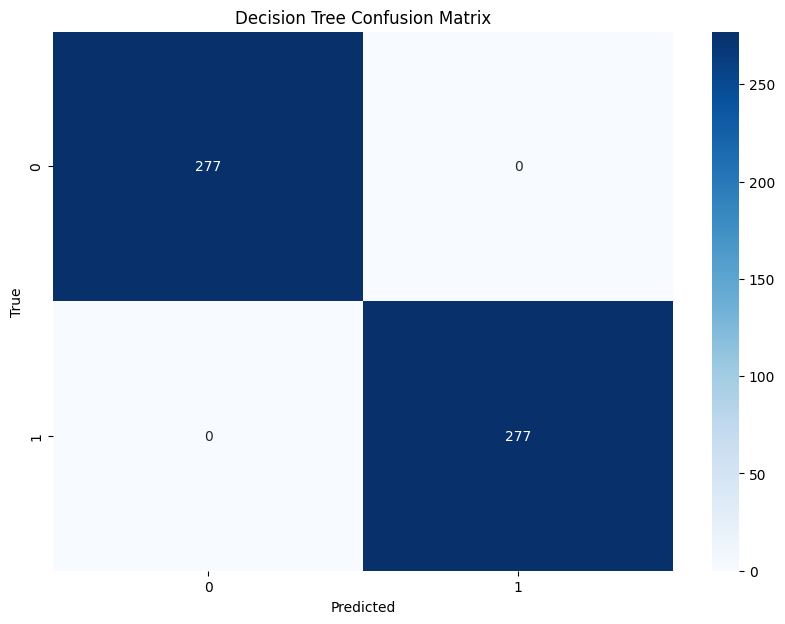

Decision Tree Accuracy: 1.0000
--------------------------------------------------
Model Random Forest saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\random_forest.joblib
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



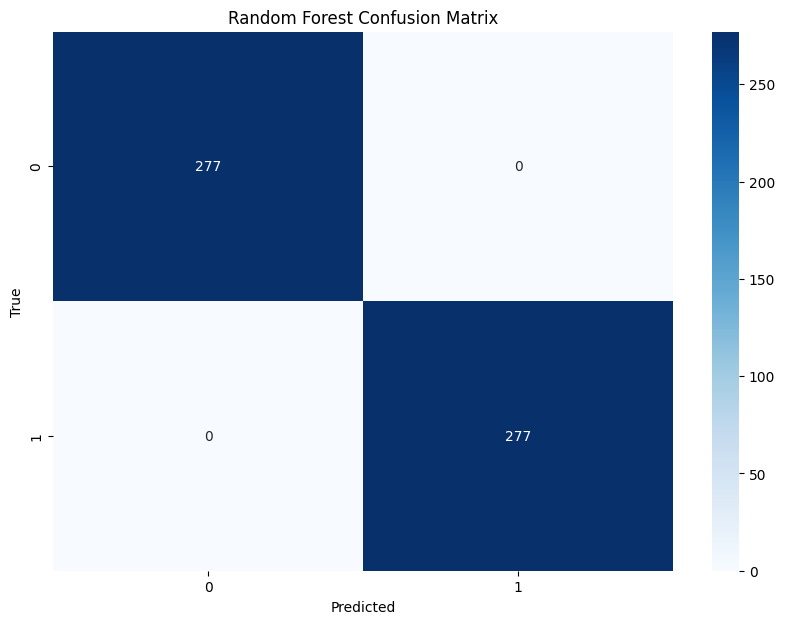

Random Forest Accuracy: 1.0000
--------------------------------------------------
Model Gradient Boosting saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\gradient_boosting.joblib
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



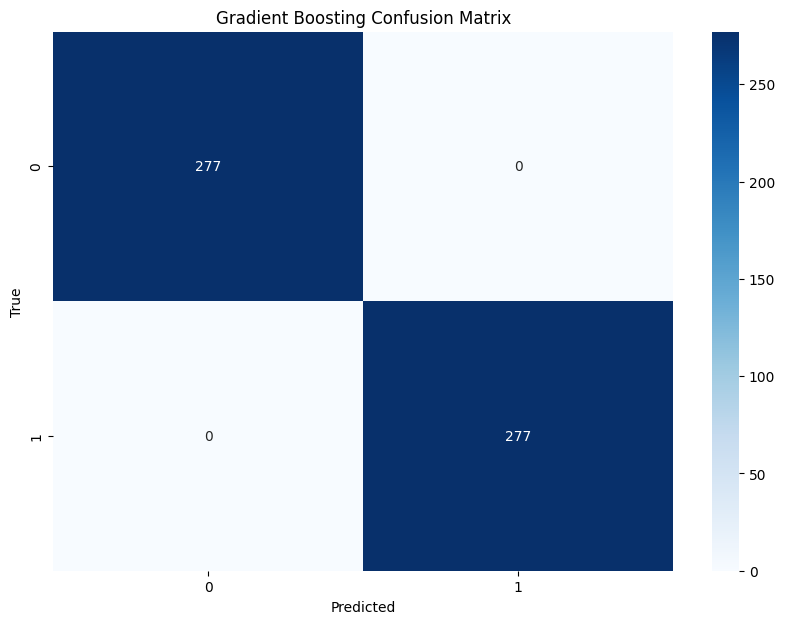

Gradient Boosting Accuracy: 1.0000
--------------------------------------------------
Model AdaBoost saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\adaboost.joblib
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



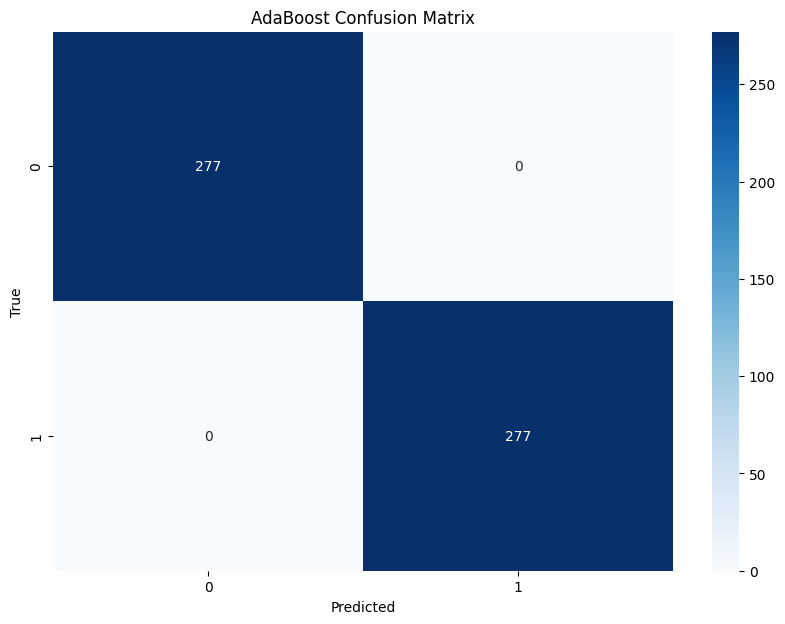

AdaBoost Accuracy: 1.0000
--------------------------------------------------
Model XGBoost saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\xgboost.joblib
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       277

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



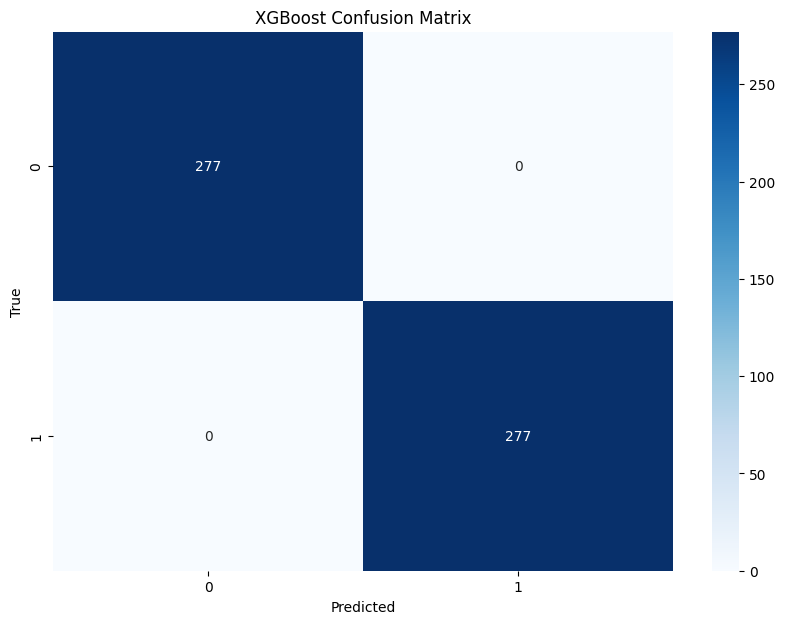

XGBoost Accuracy: 1.0000
--------------------------------------------------


c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from joblib import dump, load
import os

# Define the path to the directory where you want to save the models
MODEL_DIR = r"C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
# Define a function to save the models
def save_model(model, name):
    path = os.path.join(MODEL_DIR, f"{name.replace(' ', '_').lower()}.joblib")
    dump(model, path)
    return path


# Count the classes
class_counts = np.bincount(y_encoded)
# Calculate the scale_pos_weight for XGBoost
scale_pos_weight = float(class_counts[0] / class_counts[1])

# Note: Some models have hyperparameters set to avoid potential issues. 
# You should adjust these based on understanding and dataset specifics.

#Bin-classification models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Ridge Classifier", RidgeClassifier()), 
    ("SGD Classifier", SGDClassifier(max_iter=1000, tol=1e-3)),
    ("Decision Tree", DecisionTreeClassifier()), 
    ("Random Forest", RandomForestClassifier(class_weight="balanced")), # Adjusted for imbalance
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight)), # Adjusted for imbalance
    ("MLP Classifier", MLPClassifier(max_iter=1000))
]

#split the models into tree and non-tree based models
tree_models = ["XGBoost", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"]
non_tree_models = ["Logistic Regression", "Ridge Classifier", "SGD Classifier", "SVM", "Gaussian Naive Bayes", "K-Neighbors Classifier", "MLP Classifier"]

#filter the models variable to only include tree-based models
models = [model for model in models if model[0] in tree_models]

# filter the models variable to only include non-tree-based models
#models = [model for model in models if model[0] in non_tree_models]
#print(models)

num_classes = len(np.unique(y_encoded))

#Multi-classification models
#models = [
#    ("Logistic Regression", LogisticRegression(multi_class='ovr', max_iter=10000)),
#    ("Ridge Classifier", RidgeClassifier()), 
#    ("SGD Classifier", SGDClassifier(max_iter=1000, tol=1e-3)),
#    ("Decision Tree", DecisionTreeClassifier()), 
#    ("Random Forest", RandomForestClassifier(class_weight="balanced")), # Adjusted for imbalance
#    ("Gradient Boosting", GradientBoostingClassifier()),
#    ("AdaBoost", AdaBoostClassifier(algorithm='SAMME')),
#    ("SVM", SVC(probability=True)), # Added probability=True for decision boundary plotting
#    ("Gaussian Naive Bayes", GaussianNB()),
#    ("K-Neighbors Classifier", KNeighborsClassifier()),
#    ("XGBoost", XGBClassifier(use_label_encoder=False, 
#                              eval_metric="mlogloss", 
#                              objective="multi:softprob", 
#                              num_class=num_classes)), 
#    ("MLP Classifier", MLPClassifier(max_iter=1000))
#]


def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


def display_confusion_matrix(classifier, X_test, y_test):
    matrix = confusion_matrix(y_test, classifier.predict(X_test), labels=classifier.classes_)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt="d",
                xticklabels=classifier.classes_,
                yticklabels=classifier.classes_, cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

from sklearn.decomposition import PCA

from sklearn.base import clone

# Continue using your PCA as before
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models, plot decision boundaries, and display confusion matrices
results = []
for name, model in models:
    model.fit(X_train, y_train)  # Training on original data
    y_pred = model.predict(X_test)  # Predicting on original data
    
    # Save the trained model
    saved_path = save_model(model, name)
    print(f"Model {name} saved to {saved_path}")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"{name} Classification Report:")
    print(report)
    
    # Display confusion matrix (using the original X_test)
    display_confusion_matrix(model, X_test, y_test)  
    
    # Now for the decision boundary, we need to train the model again on PCA data.
    # Clone the model to avoid refitting the original one
    model_clone = clone(model)
    model_clone.fit(X_train_pca, y_train)
    
    # Plot decision boundaries using the model trained on PCA data
    #plt.figure(figsize=(10,6))
    #plot_decision_boundary(lambda x: model_clone.predict(x), X_train_pca, y_train)
    #plt.title(name)
    #plt.show()
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("--------------------------------------------------")



In [ ]:
# Fit the encoder on the first dataset's categorical columns
ordinal_encoder.fit(data[categorical_features])
#print(ordinal_encoder.categories_)
print(data[categorical_features].head())

#save the ordinal_encoder, label_encoder, and preprocessor to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing


#MODEL_DIR = r"C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing"
saved_path = save_model(preprocessor, 'tree_preprocessor')
saved_path = save_model(label_encoder, 'label_encoder')
saved_path = save_model(ordinal_encoder, 'ordinal_encoder')
print(f"Model saved to {saved_path}")

      TEAM_ID  TEAM_ID_OPP Home_Away MATCHUP_ID
0  1610612749   1610612763      Home     MEMMIL
1  1610612763   1610612749      Away     MEMMIL
2  1610612764   1610612744      Away     GSWWAS
3  1610612744   1610612764      Home     GSWWAS
4  1610612766   1610612738      Away     BOSCHA
Model saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\ordinal_encoder.joblib


In [ ]:
#read "unseen" data so we can test what these models would predict for the 2022 playoffs
#prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_test_unseen_dataset.csv')
prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv')

print(prediction_data.head())

# Drop the columns that are not needed Matchup
#prediction_data = prediction_data.drop(columns=['MATCHUP'])

    
# Define the desired feature order
#feature_order = ['TEAM_ID', 'MATCHUP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'Home_Away', 'FG_PCT_OPP', 'FG3_PCT_OPP', 
                  #'FT_PCT_OPP', 'PLUS_MINUS_OPP', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 
                 #'DRtg', 'DPER%', 'YEAR', 'MONTH', 'DAY',
                 #'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF'] #, 'MATCHUP'

feature_order = ['TEAM_ID', 'TEAM_ID_OPP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'Home_Away', 'MATCHUP_ID',# 'FG_PCT_OPP', 'FG3_PCT_OPP',  'SEASON_ID', 'GAME_ID'
                   'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', #'FT_PCT_OPP', 'PLUS_MINUS_OPP','TS%_OPP', 'eFG%_OPP', 'AST%_OPP', , 'MATCHUP'
                  'YEAR', 'MONTH', 'DAY', #'DRtg', 'DPER%',
                 'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF'] #, 'MATCHUP'


# Reorder columns in the new_data DataFrame
prediction_data = prediction_data[feature_order]
print(prediction_data.head())

      TEAM_ID  TEAM_ID_OPP    FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS  \
0  1610612753   1610612757  0.454593  0.325175  0.781338   -4.513636   
1  1610612744   1610612758  0.472100  0.367704  0.807018   -4.520833   
2  1610612757   1610612753  0.476456  0.370515  0.809298   -4.023810   
3  1610612758   1610612744  0.500481  0.377097  0.787356    4.021277   
4  1610612743   1610612763  0.496487  0.368552  0.782801   -1.339623   

  Home_Away MATCHUP_ID       TS%        ORtg        PER%      eFG%       AST%  \
0      Away     ORLPOR  0.556252  106.422954  111.276628  0.515617  25.144357   
1      Away     GSWSAC  0.591736  111.909070  119.740314  0.559620  32.021301   
2      Home     ORLPOR  0.597247  113.992785  115.028869  0.555587  27.946503   
3      Home     GSWSAC  0.614944  119.180333  121.616377  0.578884  31.096681   
4      Away     DENMEM  0.593824  113.828729  121.647575  0.561594  32.235397   

   YEAR  MONTH  DAY  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0  2023

In [ ]:
#############################################################################################################

#load the encoder from C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models
ordinal_encoder = load(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\ordinal_encoder.joblib')

# Fit the encoder on the first dataset's categorical columns
ordinal_encoder.fit(data[categorical_features])

#save the encoder to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models
saved_path = save_model(ordinal_encoder, 'ordinal_encoder')
print(f"Model saved to {saved_path}")

# Transform the categorical columns in dataset1 using the fitted encoder
#print(data.head())
#preprocessor_data[categorical_features] = ordinal_encoder.transform(preprocessor_data[categorical_features])
#print(preprocessor_data.head())

print(prediction_data.head())
# Use OrdinalEncoder for the categorical columns
prediction_data[categorical_features] = ordinal_encoder.transform(prediction_data[categorical_features])
print(prediction_data.head())

# Check if the categorical columns in dataset1 and dataset2 are the same
if set(prediction_data[categorical_features]) != set(preprocessor_data[categorical_features]):
    raise ValueError("Categorical columns in dataset1 do not match dataset2")



Model saved to C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\ordinal_encoder.joblib
      TEAM_ID  TEAM_ID_OPP    FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS  \
0  1610612753   1610612757  0.454593  0.325175  0.781338   -4.513636   
1  1610612744   1610612758  0.472100  0.367704  0.807018   -4.520833   
2  1610612757   1610612753  0.476456  0.370515  0.809298   -4.023810   
3  1610612758   1610612744  0.500481  0.377097  0.787356    4.021277   
4  1610612743   1610612763  0.496487  0.368552  0.782801   -1.339623   

  Home_Away MATCHUP_ID       TS%        ORtg        PER%      eFG%       AST%  \
0      Away     ORLPOR  0.556252  106.422954  111.276628  0.515617  25.144357   
1      Away     GSWSAC  0.591736  111.909070  119.740314  0.559620  32.021301   
2      Home     ORLPOR  0.597247  113.992785  115.028869  0.555587  27.946503   
3      Home     GSWSAC  0.614944  119.180333  121.616377  0.578884  31.096681   
4      Away   

   TEAM_ID  TEAM_ID_OPP    FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS  Home_Away  \
0     16.0         20.0  0.454593  0.325175  0.781338   -4.513636        0.0   
1      7.0         21.0  0.472100  0.367704  0.807018   -4.520833        0.0   
2     20.0         16.0  0.476456  0.370515  0.809298   -4.023810        1.0   
3     21.0          7.0  0.500481  0.377097  0.787356    4.021277        1.0   
4      6.0         26.0  0.496487  0.368552  0.782801   -1.339623        0.0   

   MATCHUP_ID       TS%        ORtg        PER%      eFG%       AST%  YEAR  \
0       401.0  0.556252  106.422954  111.276628  0.515617  25.144357  2023   
1       240.0  0.591736  111.909070  119.740314  0.559620  32.021301  2023   
2       401.0  0.597247  113.992785  115.028869  0.555587  27.946503  2023   
3       240.0  0.614944  119.180333  121.616377  0.578884  31.096681  2023   
4       188.0  0.593824  113.828729  121.647575  0.561594  32.235397  2023   

   MONTH  DAY  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_D

In [ ]:
#check for these team_id's in the prediction_data [1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]
prediction_teams = prediction_data['TEAM_ID'].unique()
print(prediction_teams)

# Fit the encoder on the first dataset's categorical columns
#ordinal_encoder.fit(preprocessor_data[categorical_features])

# Use OrdinalEncoder for the categorical columns
#prediction_data[categorical_features] = ordinal_encoder.transform(prediction_data[categorical_features])

print(prediction_data.head())



[16.  7. 20. 21.  6. 28. 26. 29. 15. 23. 11.  0.  2.  1. 24.  8.  4. 22.
 14.  5.  9. 25. 19. 27.  3. 17. 18. 13. 10. 12.]
   TEAM_ID  TEAM_ID_OPP    FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS  Home_Away  \
0     16.0         20.0  0.454593  0.325175  0.781338   -4.513636        0.0   
1      7.0         21.0  0.472100  0.367704  0.807018   -4.520833        0.0   
2     20.0         16.0  0.476456  0.370515  0.809298   -4.023810        1.0   
3     21.0          7.0  0.500481  0.377097  0.787356    4.021277        1.0   
4      6.0         26.0  0.496487  0.368552  0.782801   -1.339623        0.0   

   MATCHUP_ID       TS%        ORtg        PER%      eFG%       AST%  YEAR  \
0       401.0  0.556252  106.422954  111.276628  0.515617  25.144357  2023   
1       240.0  0.591736  111.909070  119.740314  0.559620  32.021301  2023   
2       401.0  0.597247  113.992785  115.028869  0.555587  27.946503  2023   
3       240.0  0.614944  119.180333  121.616377  0.578884  31.096681  2023   
4     

In [ ]:
#load in preprocessing from C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models
preprocessor = load(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\tree_preprocessor.joblib')

# Preprocess X_new
X_new_preprocessed = preprocessor.transform(prediction_data)
print(X_new_preprocessed.shape)
#print(X_new_preprocessed)
X_unseen_preprocessed = pd.DataFrame(X_new_preprocessed, columns=feature_names)
print(X_unseen_preprocessed.head())


(68, 24)
     FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS       TS%        ORtg        PER%  \
0  0.456855  0.330838  0.790817   -4.533879  0.555389  105.636974  112.311415   
1  0.474125  0.373493  0.816869   -4.541112  0.590412  111.082101  120.852584   
2  0.478422  0.376312  0.819182   -4.041619  0.595851  113.150248  116.098007   
3  0.502123  0.382913  0.796922    4.043430  0.613318  118.299038  122.745823   
4  0.498183  0.374343  0.792301   -1.344099  0.592472  112.987418  122.777306   

       eFG%       AST%  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0  0.521915  25.318753     0.015857      0.011098     0.008790  0.023110   
1  0.565472  32.239926     0.009839      0.008212    -0.027625  0.001333   
2  0.561479  28.138921     0.018674      0.019706    -0.023804  0.003778   
3  0.584541  31.309359    -0.003433     -0.023147    -0.007479 -0.016554   
4  0.567426  32.455399    -0.006663     -0.016506    -0.007206 -0.006438   

   eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  

In [ ]:
# Load the trained Random Forest model
MODEL_DIR = r"C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models"
xgboost = os.path.join(MODEL_DIR, "xgboost.joblib")
trained_rf = load(xgboost)

# Predict using the trained model
predictions_rf = trained_rf.predict(X_unseen_preprocessed)

# Convert predictions back from encoded form to original labels
decoded_predictions_rf = label_encoder.inverse_transform(predictions_rf)

# Add predictions as a new column to the original dataframe
prediction_data['PREDICTION'] = decoded_predictions_rf

# Inverse transform the encoded categorical columns back to their original form
prediction_data[categorical_features] = ordinal_encoder.inverse_transform(prediction_data[categorical_features])

# Display the results with the original values
#print(prediction_data.head())

# put YEAR, MONTH, DAY into a date column
prediction_data['Date'] = pd.to_datetime(prediction_data[['YEAR', 'MONTH', 'DAY']])
#sort by date
prediction_data = prediction_data.sort_values(by=['Date'])
print(prediction_data.head())

       TEAM_ID TEAM_ID_OPP    FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS  \
40  1610612756  1610612744  0.462793  0.358759  0.797852   -1.125000   
41  1610612744  1610612756  0.475678  0.386994  0.768642    7.745098   
42  1610612747  1610612743  0.476464  0.335669  0.789947   -3.509804   
43  1610612743  1610612747  0.504385  0.384390  0.740941    9.229630   
67  1610612759  1610612742  0.474388  0.349252  0.742072   -6.431818   

   Home_Away MATCHUP_ID       TS%        ORtg        PER%      eFG%  \
40      Away     GSWPHX  0.562174  111.621718  122.903735  0.526527   
41      Home     GSWPHX  0.594860  114.725678  128.606069  0.567262   
42      Away     DENLAL  0.576345  110.741055  114.875990  0.534696   
43      Home     DENLAL  0.603544  117.680293  128.905640  0.574439   
67      Home     DALSAS  0.563802  108.970912  117.036407  0.535016   

         AST%  YEAR  MONTH  DAY  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  \
40  29.650896  2023     10   24     0.009186      0.001317    -0.

In [ ]:
# Assuming you've already read in your df1
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')

# Filter df1 to only unique TEAM_ID, TEAM_NAME, and SEASON_ID
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()

# Merge unique_teams with prediction_data
prediction_data = prediction_data.merge(unique_teams, on='TEAM_ID', how='left')
#print(prediction_data.head())
#print(len(prediction_data))

# Drop unnecessary columns
columns_to_drop = ["TEAM_ID", "TEAM_ID_OPP", "YEAR", "MONTH", "DAY"]
prediction_data = prediction_data.drop(columns=columns_to_drop)  # using errors='ignore' to avoid any error if columns are not present


# print this list:
season_pred = prediction_data#[['TEAM_NAME', 'TEAM_ABBREVIATION', 'PREDICTION', 'Date', 'MATCHUP_ID', 'Home_Away']]
print(season_pred.head())

#save this to a csv
season_pred.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\season_pred.csv', index=False)

     FG_PCT   FG3_PCT    FT_PCT  PLUS_MINUS Home_Away MATCHUP_ID       TS%  \
0  0.462793  0.358759  0.797852   -1.125000      Away     GSWPHX  0.562174   
1  0.475678  0.386994  0.768642    7.745098      Home     GSWPHX  0.594860   
2  0.476464  0.335669  0.789947   -3.509804      Away     DENLAL  0.576345   
3  0.504385  0.384390  0.740941    9.229630      Home     DENLAL  0.603544   
4  0.474388  0.349252  0.742072   -6.431818      Home     DALSAS  0.563802   

         ORtg        PER%      eFG%       AST%  FG_PCT_DIFF  FG3_PCT_DIFF  \
0  111.621718  122.903735  0.526527  29.650896     0.009186      0.001317   
1  114.725678  128.606069  0.567262  33.254412    -0.027732     -0.058677   
2  110.741055  114.875990  0.534696  28.000000    -0.001454      0.025357   
3  117.680293  128.905640  0.574439  32.962567    -0.046772     -0.057916   
4  108.970912  117.036407  0.535016  30.066815     0.021265      0.025219   

   FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF

In [ ]:
# Combine predictions with team_ids for summarized results
results_by_team = pd.DataFrame({
    'TEAM_NAME': prediction_data['TEAM_NAME'],
    'TEAM_ID': prediction_data['TEAM_ID'],
    'PREDICTION': prediction_data['PREDICTION']
})

# Display results by each team_id
for team_id in results_by_team['TEAM_ID'].unique():
    team_results = results_by_team[results_by_team['TEAM_ID'] == team_id]
    team_name = team_results['TEAM_NAME'].iloc[0]
    print(f"Results for {team_name} (Team ID {team_id}):")
    print(team_results.groupby(['TEAM_NAME', 'PREDICTION']).size().reset_index(name='COUNT'))
    print("-------------------------------")

KeyError: 'TEAM_ID'

In [ ]:
import streamlit as st

# Create a function that returns the trained model based on the selected name
def train_model_by_name(model_selection):
    for name, model in models:
        if name == model_selection:
            model.fit(X_train, y_train)
            return model
    return None

# Create a function to predict using a trained model and display the predictions
def predict_with_model(trained_model):
    predictions_rf = trained_model.predict(X_unseen_preprocessed)
    decoded_predictions_rf = label_encoder.inverse_transform(predictions_rf)
    prediction_data['PREDICTION'] = decoded_predictions_rf
    prediction_data[categorical_features] = ordinal_encoder.inverse_transform(prediction_data[categorical_features])

    season_pred = prediction_data[['TEAM_NAME', 'TEAM_ABBREVIATION', 'PREDICTION', 'Date', 'MATCHUP']]
    return season_pred

# Streamlit app main function
def main():

    st.title('NBA Game Prediction Model Selection')

    # Allow model selection
    model_selection = st.selectbox("Choose a Model:", [name for name, _ in models])

    # Display model training progress
    with st.spinner(f"Training {model_selection}..."):
        trained_model = train_model_by_name(model_selection)
    st.success(f"{model_selection} trained!")

    # Display accuracy on the training data
    y_pred = trained_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    st.write(f"Accuracy of {model_selection} on Training Data: {accuracy:.4f}")

    # Display predictions
    st.header("Predictions for Upcoming Games")
    season_pred_df = predict_with_model(trained_model)
    
    st.write(season_pred_df)

# Ensure the app runs when the script is executed
if __name__ == '__main__':
    main()


: 

In [ ]:
import streamlit as st
import os
import pandas as pd

# Streamlit app main function
def main():

    st.title('NBA Game Prediction Model Selection')

    # List available models from the directory
    available_models = [f.split('_predictions.csv')[0] for f in os.listdir('models') if f.endswith('_predictions.csv')]

    # Allow model selection
    model_selection = st.selectbox("Choose a Model:", available_models)

    # Load pre-computed predictions for the selected model
    predictions_path = os.path.join('models', f"{model_selection}_predictions.csv")
    predictions_df = pd.read_csv(predictions_path)

    st.header(f"Predictions from {model_selection}")
    st.write(predictions_df)

# Ensure the app runs when the script is executed
if __name__ == '__main__':
    main()


: 

: 